# 참고
사실상 본 글은 다음 사이트의 내용 및 코드를 보고 따라한 것에 불과한 글임.
https://github.com/BaekKyunShin/Kaggle/blob/master/SanFrancisco_Crime_Classification/4.%20San%20Francisco%20Crime%20Classification%20from%20a%20top%20ranker.ipynb
https://www.kaggle.com/yannisp/sf-crime-analysis-prediction

In [2]:
import os
os.getcwd()

'C:\\Users\\assistant\\Downloads'

## 데이터 변수
샌프란시스코에서 2003.1.6.부터 2015.5.13. 까지의 발생한 범죄에 대한 데이터
 - Dates - 범죄가 일어난 일시 
 - Category - 범죄 유형 (Target Variable) 
 - Descript - 범죄에 대한 자세한 설명 (test data에 없음. 모델링에 필요 없는 변수임.)
 - DayOfWeek - 요일 
 - PdDistrict - 경찰 관할 지역 명칭 
 - Resolution - 범죄 해결 여부 (test data에 없음. 모델링에 필요 없는 변수임.)
 - Address - 범죄 발생 주소 
 - X - 경도(Longitude) 
 - Y - 위도(Latitude)

In [4]:
import pandas as pd
train = pd.read_csv('train_SFC.csv', parse_dates=['Dates'])
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [5]:
test = pd.read_csv('test_SFC.csv', parse_dates=['Dates'], index_col='Id')

In [6]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

In [7]:
train.shape

# 훈련 데이터는 2003.1.6.부터 2015.5.13.까지의 범죄를 담고 있으며, 총 9개의 features가 있음

(878049, 9)

In [8]:
train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [9]:
train.dtypes

# object type, 즉 string type은 카테고리형 데이터이기 때문에 추후 인코딩이 필요함

Dates         datetime64[ns]
Category              object
Descript              object
DayOfWeek             object
PdDistrict            object
Resolution            object
Address               object
X                    float64
Y                    float64
dtype: object

In [10]:
# .dtypes와 .info() 차이는 어떻게 될까?
train.info()

# .info()가 더 자세히 나오는 듯. 데이터 개수, null 여부, 메모리 사용량 등을 보여줌

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
Dates         878049 non-null datetime64[ns]
Category      878049 non-null object
Descript      878049 non-null object
DayOfWeek     878049 non-null object
PdDistrict    878049 non-null object
Resolution    878049 non-null object
Address       878049 non-null object
X             878049 non-null float64
Y             878049 non-null float64
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 60.3+ MB


In [11]:
train.duplicated().sum()

# 2323개의 중복행이 존재해 제거해줘야 함

2323

In [12]:
import geopandas as gpd
from shapely.geometry import Point

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf['Coordinates'] = gdf['Coordinates'].apply(Point)
    gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(train)
train_gdf

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,POINT (-122.42436 37.80041)
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,POINT (-122.43874 37.77154)
...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,POINT (-122.45903 37.71406)
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,POINT (-122.44736 37.73195)
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,POINT (-122.40339 37.78027)
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,POINT (-122.39053 37.78061)


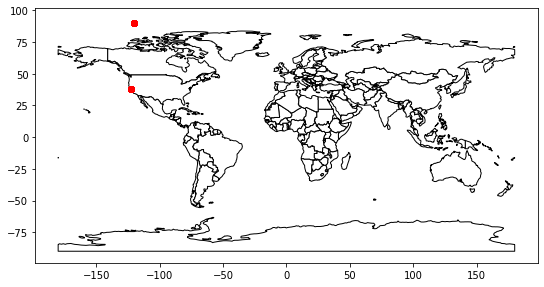

In [17]:
# San Francisco 지역의 범죄에 대한 데이터인데 지역 밖에 찍힌 데이터가 존재함. 즉, 이상치 존재.
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
f, ax = plt.subplots(1, figsize=(9,9))
ax = world.plot(color='white', edgecolor='black', ax=ax)
train_gdf.plot(ax=ax, color='red');

In [14]:
# 위 그래프의 Y축을 기준으로 이상치 확인
train_gdf[train_gdf.Y > 75]

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,POINT (-120.50000 90.00000)
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,POINT (-120.50000 90.00000)
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,POINT (-120.50000 90.00000)
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,POINT (-120.50000 90.00000)
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,POINT (-120.50000 90.00000)
...,...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.50000 90.00000)
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,POINT (-120.50000 90.00000)
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,POINT (-120.50000 90.00000)
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0,POINT (-120.50000 90.00000)


In [15]:
train_gdf[train_gdf.Y > 75].count()[0]

# 총 67개의 데이터의 좌표가 잘못되어 있음. 제거할지, 대체할지 생각해봐야 함.

67

In [16]:
# 2323개의 중복행 제거
train.drop_duplicates(inplace=True)
train

# 878049 rows × 9 columns → 875726 rows × 9 columns 

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607


In [18]:
# 67개의 NaN 값에 평균값 대입
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [19]:
for district in train['PdDistrict'].unique():
    train.loc[train['PdDistrict']==district, ['X', 'Y']] = imputer.fit_transform(
        train.loc[train['PdDistrict']==district, ['X', 'Y']])
    
    # fit은 train 데이터로 해주었기때문에 transform만 적용
    # → fit_trarnsform을 적용할 경우, test 데이터로 fit을 하게 되어 overfitting이 일어날 수 있음
    test.loc[test['PdDistrict']==district, ['X', 'Y']] = imputer.transform( 
        test.loc[test['PdDistrict']==district, ['X', 'Y']])    
    
train_gdf = create_gdf(train)
train_gdf

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Coordinates
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,POINT (-122.42589 37.77460)
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,POINT (-122.42436 37.80041)
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,POINT (-122.42700 37.80087)
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,POINT (-122.43874 37.77154)
...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,POINT (-122.45903 37.71406)
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,POINT (-122.44736 37.73195)
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,POINT (-122.40339 37.78027)
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,POINT (-122.39053 37.78061)


## Dates and DayofWeek

In [20]:
train['Date'] = train['Dates'].dt.date # 날짜
train['Year'] = train['Dates'].dt.year # 년
train['Month'] = train['Dates'].dt.month # 월
train['Day'] = train['Dates'].dt.day # 일
train['Hour'] = train['Dates'].dt.hour # 시간

In [21]:
train

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Date,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015-05-13,2015,5,13,23
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015-05-13,2015,5,13,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
878044,2003-01-06 00:15:00,ROBBERY,ROBBERY ON THE STREET WITH A GUN,Monday,TARAVAL,NONE,FARALLONES ST / CAPITOL AV,-122.459033,37.714056,2003-01-06,2003,1,6,0
878045,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,INGLESIDE,NONE,600 Block of EDNA ST,-122.447364,37.731948,2003-01-06,2003,1,6,0
878046,2003-01-06 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Monday,SOUTHERN,NONE,5TH ST / FOLSOM ST,-122.403390,37.780266,2003-01-06,2003,1,6,0
878047,2003-01-06 00:01:00,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Monday,SOUTHERN,NONE,TOWNSEND ST / 2ND ST,-122.390531,37.780607,2003-01-06,2003,1,6,0


In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 875726 entries, 0 to 878048
Data columns (total 14 columns):
Dates         875726 non-null datetime64[ns]
Category      875726 non-null object
Descript      875726 non-null object
DayOfWeek     875726 non-null object
PdDistrict    875726 non-null object
Resolution    875726 non-null object
Address       875726 non-null object
X             875726 non-null float64
Y             875726 non-null float64
Date          875726 non-null object
Year          875726 non-null int64
Month         875726 non-null int64
Day           875726 non-null int64
Hour          875726 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 100.2+ MB


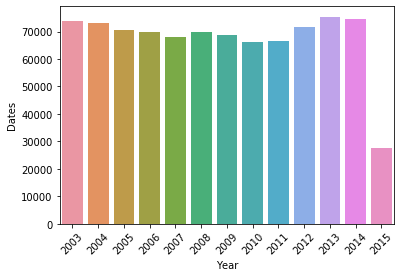

In [23]:
import seaborn as sns
year_series = train.groupby('Year').count().iloc[:, 0] # (col1 : Year, col2 : Dates)
g = sns.barplot(x=year_series.index, y=year_series) # (x=Year, y=Dates)
g.set_xticklabels(g.get_xticklabels(), rotation=45); # x축 이름을 반시계 방향 45도 회전

# 다음 도표는 연도별 범죄 발생 건수에 대한 막대그래프로, 2003-2014년까지는 범죄 건수가 거의 유사했지만, 2015년에 급감한 수치를 보임

10
80038
12
64856


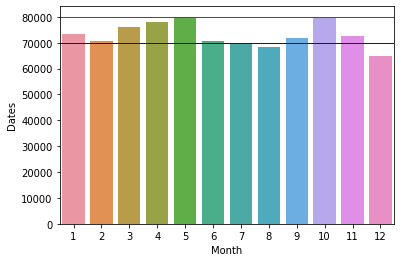

In [24]:
month_series = train.groupby('Month').count().iloc[:, 0]
sns.barplot(x=month_series.index, y=month_series);
plt.axhline(y=80000, color='r', linewidth=1) # Dates 값이 80,000인 지점에 빨간 수평선 작성
plt.axhline(y=70000, color='b', linewidth=1) # Dates 값이 70,000인 지점에 파란 수평선 작성


print(month_series.idxmax())
print(month_series.max())
print(month_series.idxmin())
print(month_series.min())

## 다음 도표는 월별 범죄 발생 건수에 대한 그래프로 다음 사항을 보여줌
# 10월에 가장 많았고, 12월에 가장 적었음
# 5월에 그 다음으로 가장 많았고, 8월에 그 다음으로 가장 적었음
# San Francisco의 월별 기상상태에 따른 범죄 발생 건수, 계절별 기상상태에 따른 발생 건수를 고려할 수 있을지도..?

18
54978
5
8609


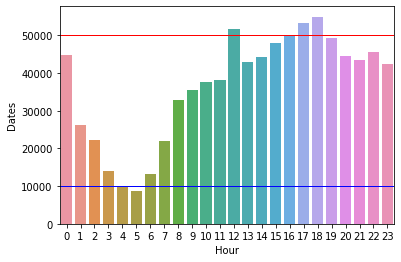

In [25]:
hour_series = train.groupby('Hour').count().iloc[:, 0]
sns.barplot(x=hour_series.index, y=hour_series);
plt.axhline(y=50000, color='r', linewidth=1) 
plt.axhline(y=10000, color='b', linewidth=1)

print(hour_series.idxmax())
print(hour_series.max())
print(hour_series.idxmin())
print(hour_series.min())

## 다음 도표는 시간대별 범죄 발생 건수에 대한 그래프로 다음 사항을 보여줌
# 새벽 5시에 범죄 발생 건수가 가장 적고, 오후 6시에 범죄 발생 건수가 가장 많음
# 새벽 5시를 시작으로 범죄 발생 건수가 높아지다가 새벽 6시 이후로 새벽 5시까지 범죄 발생 건수가 낮아지는 추세를 볼 수 있음
# 오후 12시의 범죄 발생 건수가 유독 많은 것에 대해 점심시간과 관련이 있을지도 모름

Friday
133371
Sunday
116394


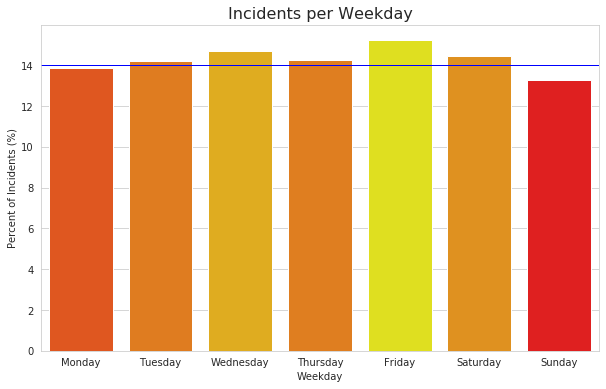

In [26]:
from matplotlib import cm
weekday_series = train.groupby('DayOfWeek').count().iloc[:,0]
weekday_series = weekday_series.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'])

with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(1, figsize=(10, 6))
    sns.barplot(
        weekday_series.index, (weekday_series.values / weekday_series.values.sum()) * 100,
        palette=cm.ScalarMappable(cmap='autumn').to_rgba(weekday_series.values))

plt.title('Incidents per Weekday', fontdict={'fontsize':16})
plt.xlabel('Weekday')
plt.ylabel('Percent of Incidents (%)');

plt.axhline(y=14, color='b', linewidth=1) 

print(weekday_series.idxmax())
print(weekday_series.max())
print(weekday_series.idxmin())
print(weekday_series.min())

## 다음 도표는 요일별 범죄 발생 건수에 대한 그래프로 다음 사항을 보여줌
# 일요일에 범죄 발생 건수가 가장 적고, 금요일에 범죄 발생 건수가 가장 많음

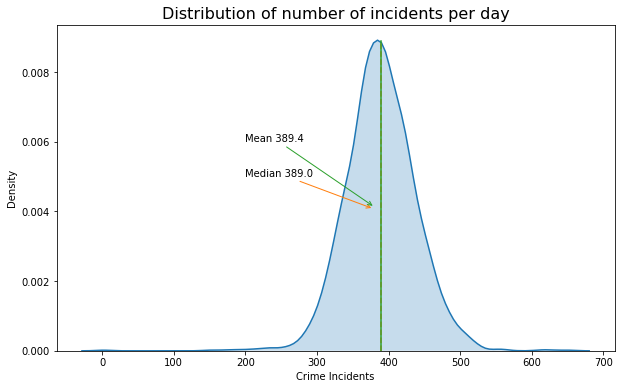

In [27]:
palette = sns.color_palette()

plt.figure(figsize=(10, 6))
date_count = train.groupby('Date').count().iloc[:, 0]
sns.kdeplot(data=date_count, shade=True)
plt.axvline(x=date_count.median(), ymax=0.95, linestyle='--', color=palette[1])
plt.axvline(x=date_count.mean(), ymax=0.95, linestyle='-', color=palette[2])
plt.annotate('Median ' + str(date_count.median()),
             xy=(date_count.median(), 0.004),
             xytext=(200, 0.005),
             arrowprops=dict(arrowstyle='->', color=palette[1], shrinkB=10))
plt.annotate('Mean ' + str(round(date_count.mean(), 1)),
             xy=(round(date_count.mean(), 1), 0.004),
             xytext=(200, 0.006),
             arrowprops=dict(arrowstyle='->', color=palette[2], shrinkB=10))
plt.title('Distribution of number of incidents per day',fontdict={'fontsize':16})
plt.xlabel('Crime Incidents')
plt.ylabel('Density')
plt.legend().remove()
plt.show()

# 하루동안 발생하는 범죄 건수는 정규 분포를 그리고 있고, 평균값은 389.4, 중앙값은 389임

## Category

In [28]:
category_counts = train.groupby('Category').count().iloc[:, 0].sort_values(ascending=False)
category_counts

# LARCENY/THEFT                  # 절도
# NON-CRIMINAL                   # 비범죄
# ASSAULT                        # 폭행
# DRUG/NARCOTIC                  # 마약
# VEHICLE THEFT                  # 차량 도난
# VANDALISM                      # 공공 기물 파손
# WARRANTS                       # 구속영장
# BURGLARY                       # 외설
# SUSPICIOUS OCC                 # 
# MISSING PERSON                 # 실종
# ROBBERY                        # 강도 
# FRAUD                          # 사기 
# FORGERY/COUNTERFEITING         # 위조
# SECONDARY CODES                # 
# WEAPON LAWS                    # 무기 관련 법
# PROSTITUTION                   # 성매매 
# TRESPASS                       # 불법침입
# STOLEN PROPERTY                # 재산 도난 
# SEX OFFENSES FORCIBLE          # 강제적 성범죄 
# DISORDERLY CONDUCT             # 치안문란
# DRUNKENNESS                    # 취중
# RECOVERED VEHICLE              # 견인 
# KIDNAPPING                     # 납치 
# DRIVING UNDER THE INFLUENCE    # 음주운전
# LIQUOR LAWS                    # 주류 관련 법
# RUNAWAY                        # 도망 
# ARSON                          # 방화 
# LOITERING                      # 얼쩡거림 
# EMBEZZLEMENT                   # 횡령 
# SUICIDE                        # 자살 
# FAMILY OFFENSES                # 
# BAD CHECKS                     # 불량 수표
# BRIBERY                        # 뇌물 수수
# EXTORTION                      # 강탈 
# SEX OFFENSES NON FORCIBLE      # 비강제적 성범죄 
# GAMBLING                       # 도박 
# PORNOGRAPHY/OBSCENE MAT        # 음란물 
# TREA                           # 
# OTHER OFFENSES                 # 기타 

Category
LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUN

In [30]:
# OTHER OFFENSES를 제일 아래 두기 위해
import numpy as np
category_counts = category_counts.reindex(
    np.append(np.delete(category_counts.index, 1), 'OTHER OFFENSES'))
category_counts

Category
LARCENY/THEFT                  174320
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUNAWAY                          1894
ARS

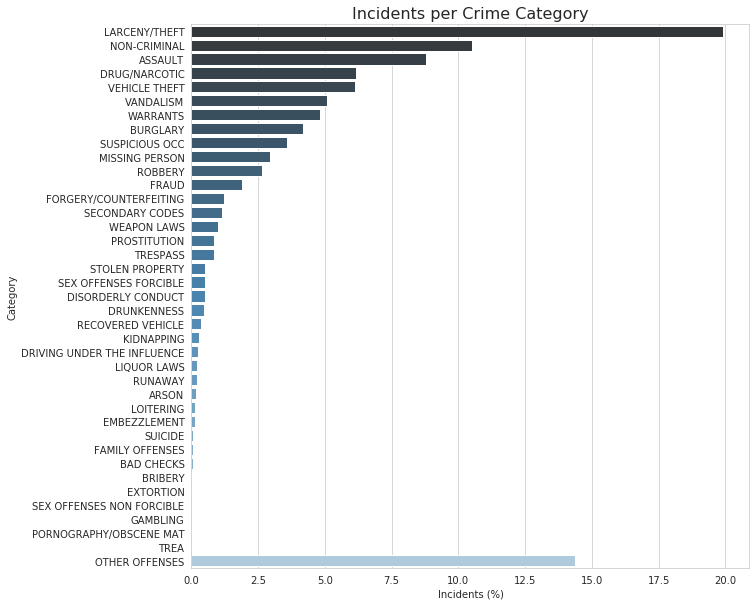

In [31]:
with sns.axes_style("whitegrid"):
    f, ax = plt.subplots(1, figsize=(10, 10))
    sns.barplot(
        category_counts.values / category_counts.values.sum() * 100,
        category_counts.index,
        orient='h',
        palette='Blues_d')
plt.title('Incidents per Crime Category', fontdict={'fontsize': 16})
plt.xlabel('Incidents (%)');

## Police District
San Franciso의 Police District를 호출, train 데이터와 merging 수행

### "b'no arguments in initialization list'"
geopandas 패키지에서 to_crs를 사용할 때, 발생할 수 있는 오류로<br>
crs, epsg와 관련 있는 pyproj 패키지의 초기 설정이 원인일 수 있음

...\Anaconda3\Lib\site-packages\pyproj의 datadir.py를 열어<br>
pyproj_datadir=".../Anaconda3/Library/share"<br>
로 변경하면 됨 (epsg 파일 등이 ...\Anaconda3\Library\share에 있음)

다음 사이트의 맨 마지막 JDOaktown의 의견을 참고하면 됨<br>
https://stackoverflow.com/questions/55390492/runtimeerror-bno-arguments-in-initialization-list

In [33]:
import pyproj # 좌표 관련
pyproj.Proj("+init=epsg:4326")

pyproj.Proj('+units=m +init=epsg:4326', preserve_units=True)

In [34]:
import urllib.request
import shutil
import zipfile
import re
# Downloading the shapefile of the area 
url = 'https://data.sfgov.org/api/geospatial/wkhw-cjsf?method=export&format=Shapefile'
with urllib.request.urlopen(url) as response, open('pd_data.zip', 'wb') as out_file:
    shutil.copyfileobj(response, out_file)
    
# Unzipping it
with zipfile.ZipFile('pd_data.zip', 'r') as zip_ref:
    zip_ref.extractall('pd_data')
    
# Loading to a geopandas dataframe
for filename in os.listdir('./pd_data/'):
    if re.match(".+\.shp", filename):
        pd_districts = gpd.read_file('./pd_data/'+filename)
        break
        
# Merging our train dataset with the geo-dataframe
pd_districts = pd_districts.merge(
    train.groupby('PdDistrict').count().iloc[:, [0]].rename(
        columns={'Dates': 'Incidents'}),
    left_on='district',
    right_index=True)

# Transforming the coordinate system to Spherical Mercator for
# compatibility with the tiling background
pd_districts = pd_districts.to_crs({'init': 'epsg:3857'})

# Calculating the incidents per day for every district
train_days = train.groupby('Date').count().shape[0]
pd_districts['inc_per_day'] = pd_districts.Incidents/train_days

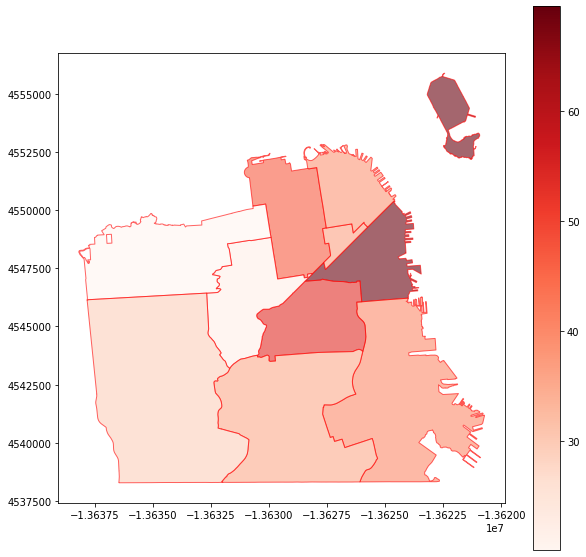

In [35]:
# Ploting the data : 구역별 하루 평균 범죄 발생 건수 시각화
fig, ax = plt.subplots(figsize=(10, 10))
pd_districts.plot(
    column='inc_per_day',
    cmap='Reds',
    alpha=0.6,
    edgecolor='r',
    linestyle='-',
    linewidth=1,
    legend=True,
    ax=ax);

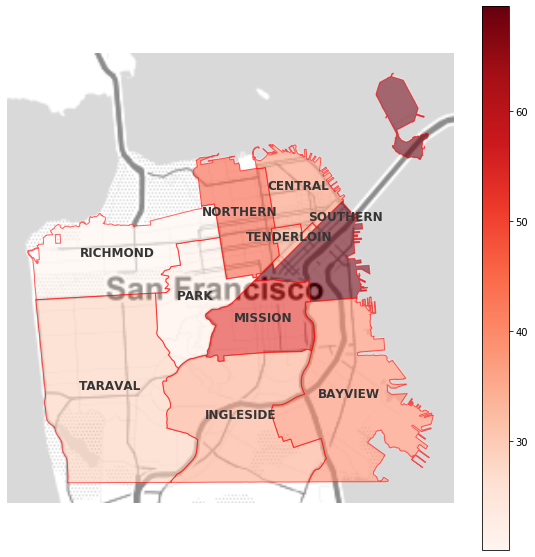

In [36]:
import contextily as ctx # 구역명 작성
fig, ax = plt.subplots(figsize=(10, 10))
pd_districts.plot(
    column='inc_per_day',
    cmap='Reds',
    alpha=0.6,
    edgecolor='r',
    linestyle='-',
    linewidth=1,
    legend=True,
    ax=ax);

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    """Function that add the tile background to the map"""
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

# Adding the background
add_basemap(ax, zoom=11, url=ctx.sources.ST_TONER_LITE)

# Adding the name of the districts
for index in pd_districts.index:
    plt.annotate(
        pd_districts.loc[index].district,
        (pd_districts.loc[index].geometry.centroid.x,
         pd_districts.loc[index].geometry.centroid.y),
        color='#353535',
        fontsize='large',
        fontweight='heavy',
        horizontalalignment='center'
    )

ax.set_axis_off()
plt.show()

## Address
구역에 대한 범죄별 발생 빈도의 시각화

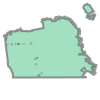

In [37]:
crimes = train['Category'].unique().tolist()
crimes.remove('TREA')

pd_districts = pd_districts.to_crs({'init': 'epsg:4326'})

# geometry containing the union of all geometries 
sf_land = pd_districts.unary_union
sf_land

In [38]:
sf_land = gpd.GeoDataFrame(gpd.GeoSeries(sf_land), crs={'init':'epsg:4326'})
sf_land = sf_land.rename(columns={0:'geometry'}).set_geometry('geometry')
sf_land

,geometry
0,"MULTIPOLYGON (((-122.37192 37.83198, -122.3718..."


C:\Users\assistant\Anaconda3\lib\site-packages\geoplot\geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None
C:\Users\assistant\Anaconda3\lib\site-packages\geoplot\geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent = gpd.GeoSeries(self.extent) if self.extent is not None else None
C:\Users\assistant\Anaconda3\lib\site-packages\geoplot\geoplot.py:625: FutureWarning:     You are passing non-geometry data to the GeoSeries constructor. Currently,
    it falls back to returning a pandas Series. But in the future, we will start
    to raise a TypeError instead.
  extent =

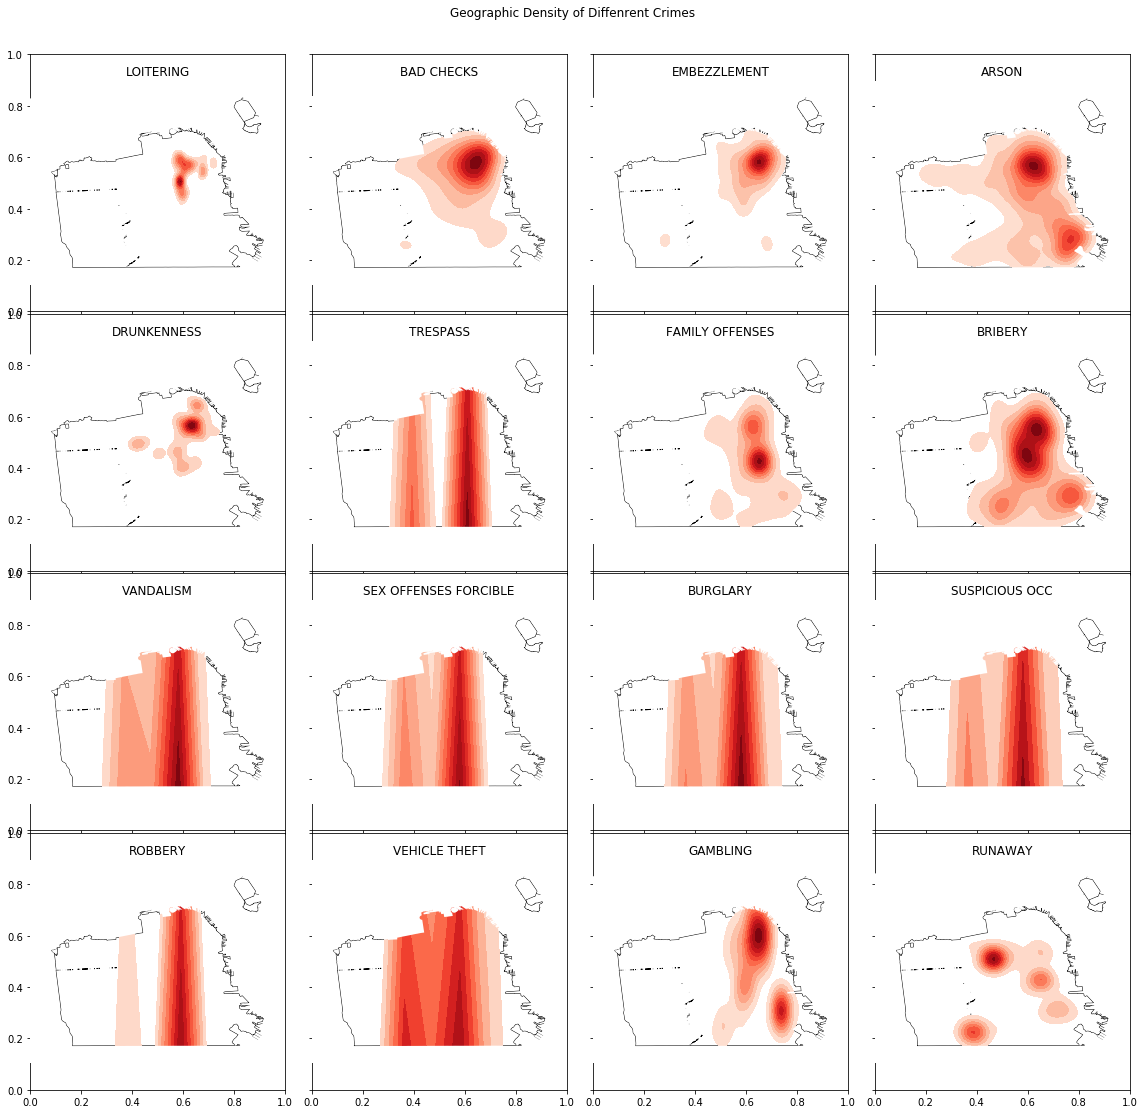

In [39]:
import geoplot as gplt # 범죄 발생 빈도 색상 표시

fig, ax = plt.subplots(4, 4, sharex=True, sharey=True, figsize=(16,16)) 
# fig, ax = plt.subplots(8, 4, sharex=True, sharey=True, figsize=(16,16)) # 세로로 8개, 가로로 4개의 그림 나오게
for i, crime in enumerate(np.random.choice(crimes, size=16, replace=False)):
    data = train_gdf.loc[train_gdf['Category'] == crime]
    ax = fig.add_subplot(4, 4, i+1)
    # ax = fig.add_subplot(8, 4, i+1) # 세로로 8개, 가로로 4개의 그림 나오게
    gplt.kdeplot(data,
                shade=True,
                shade_lowest=False, # False일 때, 0에 가까운 빈도를 가진 구역은 진하기를 표현하지 않음
                clip=sf_land.geometry, # 주어진 구역만 시각화
                cmap='Reds',
                ax=ax)
    gplt.polyplot(sf_land, ax=ax)
    ax.set_title(crime)
plt.suptitle('Geographic Density of Diffenrent Crimes')
fig.tight_layout(rect=[0, 0.03, 1, 0.95]); # 여백 설정. default=(rect=[0,0,1,1]) (왼쪽, 아래쪽, 오른쪽, 위쪽)

In [40]:
data = train.groupby(['Hour', 'Date', 'Category'],
                    as_index=False).count().iloc[:, :4] # as_index=False: Hour, Date, Category를 index로 지정하지 않음
data

,Hour,Date,Category,Dates
0,0,2003-01-06,ASSAULT,3
1,0,2003-01-06,FORGERY/COUNTERFEITING,1
2,0,2003-01-06,LARCENY/THEFT,3
3,0,2003-01-06,OTHER OFFENSES,3
4,0,2003-01-06,ROBBERY,1
...,...,...,...,...
430787,23,2015-05-12,WEAPON LAWS,1
430788,23,2015-05-13,LARCENY/THEFT,5
430789,23,2015-05-13,OTHER OFFENSES,2
430790,23,2015-05-13,VEHICLE THEFT,2


In [41]:
data.rename(columns={'Dates': 'Incidents'}, inplace=True)
data

,Hour,Date,Category,Incidents
0,0,2003-01-06,ASSAULT,3
1,0,2003-01-06,FORGERY/COUNTERFEITING,1
2,0,2003-01-06,LARCENY/THEFT,3
3,0,2003-01-06,OTHER OFFENSES,3
4,0,2003-01-06,ROBBERY,1
...,...,...,...,...
430787,23,2015-05-12,WEAPON LAWS,1
430788,23,2015-05-13,LARCENY/THEFT,5
430789,23,2015-05-13,OTHER OFFENSES,2
430790,23,2015-05-13,VEHICLE THEFT,2


In [42]:
data = data.groupby(['Hour', 'Category'], as_index=False).mean()
data

,Hour,Category,Incidents
0,0,ARSON,1.052083
1,0,ASSAULT,2.436364
2,0,BAD CHECKS,1.015625
3,0,BRIBERY,1.000000
4,0,BURGLARY,1.376268
...,...,...,...
897,23,TRESPASS,1.037037
898,23,VANDALISM,1.855731
899,23,VEHICLE THEFT,2.337049
900,23,WARRANTS,1.571429


In [43]:
data.loc[data['Category'].isin(['LARCENY/THEFT'])]

,Hour,Category,Incidents
16,0,LARCENY/THEFT,3.388081
53,1,LARCENY/THEFT,2.403706
89,2,LARCENY/THEFT,1.896396
127,3,LARCENY/THEFT,1.531384
163,4,LARCENY/THEFT,1.304038
199,5,LARCENY/THEFT,1.323149
237,6,LARCENY/THEFT,1.472995
275,7,LARCENY/THEFT,1.851711
312,8,LARCENY/THEFT,2.545595
350,9,LARCENY/THEFT,2.817409


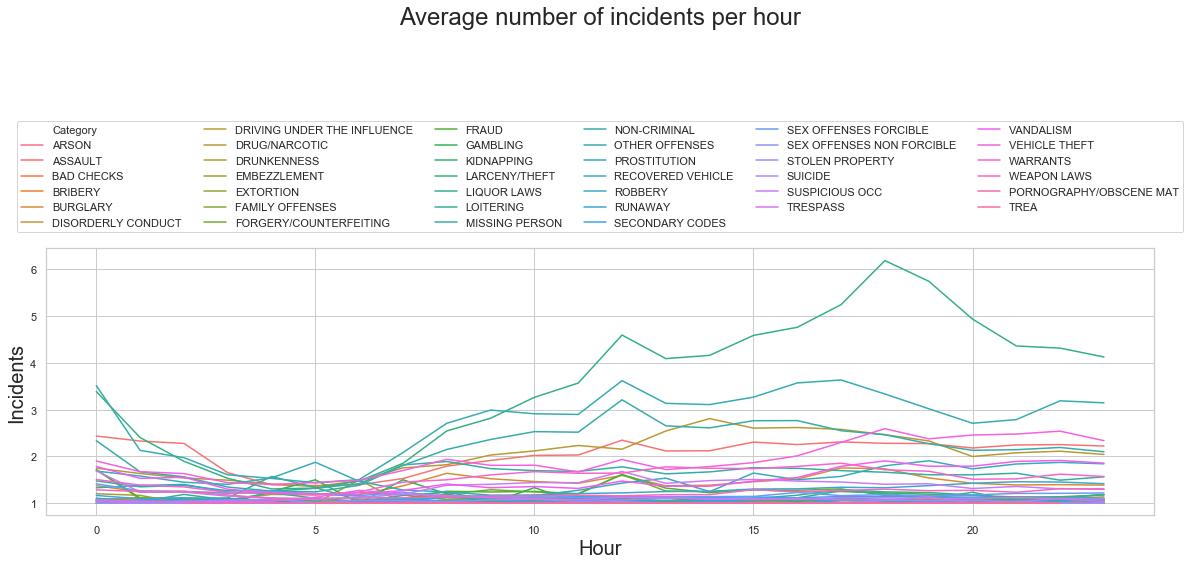

In [44]:
sns.set()
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(18, 8))
ax = sns.lineplot(data=data, x='Hour', y='Incidents', hue='Category')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5), ncol=6) # bbox_to_anchor=(오른쪽으로, 위쪽으로)
ax.set_xlabel('Hour', fontsize=20)
ax.set_ylabel('Incidents', fontsize=20)
plt.suptitle('Average number of incidents per hour', fontsize=24)
fig.tight_layout(rect=[0, 0, 1, 0.95])

## Naive prediction

In [50]:
naive_vals = train.groupby('Category').count().iloc[:, 0] / train.shape[0]
n_rows = test.shape[0]

naive_vals

Category
ARSON                          0.001727
ASSAULT                        0.087716
BAD CHECKS                     0.000464
BRIBERY                        0.000330
BURGLARY                       0.041794
DISORDERLY CONDUCT             0.004925
DRIVING UNDER THE INFLUENCE    0.002590
DRUG/NARCOTIC                  0.061571
DRUNKENNESS                    0.004884
EMBEZZLEMENT                   0.001329
EXTORTION                      0.000292
FAMILY OFFENSES                0.000557
FORGERY/COUNTERFEITING         0.012095
FRAUD                          0.018998
GAMBLING                       0.000167
KIDNAPPING                     0.002672
LARCENY/THEFT                  0.199058
LIQUOR LAWS                    0.002168
LOITERING                      0.001378
MISSING PERSON                 0.029312
NON-CRIMINAL                   0.104959
OTHER OFFENSES                 0.143835
PORNOGRAPHY/OBSCENE MAT        0.000025
PROSTITUTION                   0.008503
RECOVERED VEHICLE              

In [51]:
submission = pd.DataFrame(
    np.repeat(np.array(naive_vals), n_rows).reshape(39, n_rows).transpose(),
    columns=naive_vals.index)

submission

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
1,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
2,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
3,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
4,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884257,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
884258,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
884259,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
884260,0.001727,0.087716,0.000464,0.00033,0.041794,0.004925,0.00259,0.061571,0.004884,0.001329,...,0.000169,0.005181,0.00058,0.035849,0.000007,0.008356,0.050907,0.061327,0.048126,0.009763
